In [36]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing the libraries

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [8]:
#import the preprocess library of image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image Augmentation

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)
#rescale =  pixel value rescaling to 0 to 1 from 0 to 255
#shear_range => counter clock wise rotation(anti clock)

In [10]:
test_datagen  = ImageDataGenerator(rescale=1./255)

In [1]:
#load your images data

In [2]:
#load your images data

In [45]:
x_train = train_datagen.flow_from_directory('/content/drive/MyDrive/IBM/Flowers/training',target_size=(128,128),batch_size=32,class_mode="categorical")

Found 310 images belonging to 2 classes.


In [43]:
x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/IBM/Flowers/testing",target_size=(128,128),batch_size=32,class_mode="categorical")

Found 130 images belonging to 2 classes.


In [44]:
x_train.class_indices

{'sunflower': 0, 'tulip': 1}

# Create Model

In [46]:
#initialize the model
model = Sequential()

# Add Layers (Convolution,MaxPooling,Flatten,Dense-(Hidden Layers),Output)


In [47]:
#add convlution layer
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
# 32 => no of feature detectors
#(3,3)=> kernel size(feature detector size => 3*3 matrix)

In [48]:
#add maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [49]:
# you can add more convolutiona and pooling layers
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [50]:
#flatten layer => input layer to your ANN
model.add(Flatten())

In [51]:
#hidden layers
model.add(Dense(units=500,kernel_initializer="random_uniform",activation="relu"))
model.add(Dense(units=200,kernel_initializer="random_uniform",activation="relu"))
model.add(Dense(units=300,kernel_initializer="random_uniform",activation="relu"))
model.add(Dense(units=400,kernel_initializer="random_uniform",activation="relu"))

In [71]:
#output layer
model.add(Dense(units=2,kernel_initializer="random_uniform",activation="softmax"))

# Compile The Model

In [72]:
#compile the model
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

# Fit The Model

In [73]:
#train the model
model.fit(x_train,steps_per_epoch=107,epochs=25,validation_data=x_test,validation_steps=27)
#steps_per_epoch = no of train images/batch size
#validation_steps = no of test images/batch size

Epoch 1/25
 10/107 [=>............................] - ETA: 2:09 - loss: 0.6963 - accuracy: 0.4194

107/107 [==============================] - 62s 572ms/step - loss: 0.6963 - accuracy: 0.4194 - val_loss: 0.6968 - val_accuracy: 0.3077


# Save The Model

In [74]:
model.save("/flowers.h5")

# Test The Model

In [75]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [76]:
model = load_model("/flowers.h5")

In [61]:
img = image.load_img("/sunflower.jpg",target_size=(128,128))

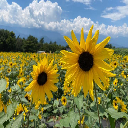

In [ ]:
img

In [19]:
x = image.img_to_array(img)

In [ ]:
x

In [21]:
x.shape

(128, 128, 3)

In [22]:
#(1,64,64,3) to expand the dims

In [23]:
x = np.expand_dims(x,axis=0)
x.shape

(1, 128, 128, 3)

In [77]:
pred_prob = model.predict(x)

In [78]:
pred_prob

array([[0.50450784, 0.4954922 ]], dtype=float32)

In [82]:
class_name=['sunflower','tulip']
pred_id = pred_prob.argmax(axis=1)[0]

In [80]:
pred_id

0

In [83]:
print("predicted Flower is ",str(class_name[pred_id]))

predicted Flower is  sunflower
